In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.loadtxt('ex2x.dat')
y=np.loadtxt('ex2y.dat')

In [3]:
print(len(x))

50


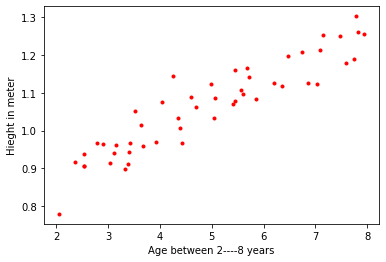

In [4]:
plt.plot(x,y,'r.')
plt.xlabel("Age between 2----8 years")
plt.ylabel("Hieght in meter")
plt.show()

In [5]:
X=torch.from_numpy(x.astype(np.float32))
Y=torch.from_numpy(y.astype(np.float32))
Y=Y.view(Y.shape[0],1)
X.unsqueeze_(1)
Y.unsqueeze_(1)

tensor([[[0.7792]],

        [[0.9160]],

        [[0.9054]],

        [[0.9057]],

        [[0.9390]],

        [[0.9668]],

        [[0.9644]],

        [[0.9145]],

        [[0.9393]],

        [[0.9607]],

        [[0.8984]],

        [[0.9121]],

        [[0.9424]],

        [[0.9662]],

        [[1.0526]],

        [[1.0144]],

        [[0.9597]],

        [[0.9685]],

        [[1.0766]],

        [[1.1455]],

        [[1.0341]],

        [[1.0070]],

        [[0.9668]],

        [[1.0896]],

        [[1.0634]],

        [[1.1237]],

        [[1.0323]],

        [[1.0874]],

        [[1.0703]],

        [[1.1606]],

        [[1.0778]],

        [[1.1070]],

        [[1.0972]],

        [[1.1649]],

        [[1.1412]],

        [[1.0844]],

        [[1.1252]],

        [[1.1168]],

        [[1.1971]],

        [[1.2069]],

        [[1.1251]],

        [[1.1236]],

        [[1.2133]],

        [[1.2523]],

        [[1.2497]],

        [[1.1800]],

        [[1.1897]],

        [[1.3

In [6]:
output_size=1
input_size=1
print(input_size)

1


In [7]:
#model creation
model=nn.Linear(input_size,output_size)

In [8]:
#loss function
loss=nn.MSELoss()

In [9]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [10]:
#now traing loop
los=[]
iterations=10
for epoch in range(iterations):
    y_pred=model(X)
    l=loss(Y,y_pred)
    los.append(l)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 1==0:
        [w,b]=model.parameters()
        print(f'epoch{epoch+1}: w={w[0][0].item():.3f},loss={l:.3f}')

epoch1: w=-0.105,loss=24.615
epoch2: w=0.120,loss=4.982
epoch3: w=0.219,loss=1.201
epoch4: w=0.261,loss=0.472
epoch5: w=0.280,loss=0.331
epoch6: w=0.288,loss=0.303
epoch7: w=0.291,loss=0.296
epoch8: w=0.292,loss=0.294
epoch9: w=0.292,loss=0.293
epoch10: w=0.291,loss=0.292


C:\Users\shehz\Desktop\new enviroment\envir1\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([50, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


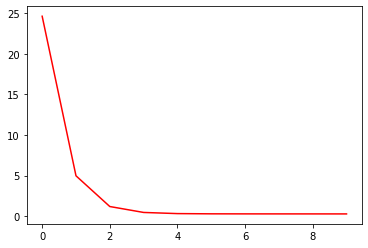

In [12]:
with torch.no_grad():
    plt.plot(los,'r')
    
    plt.show()

In [15]:
print("the actual value ",Y[4])

tensor([[0.9390]])


In [19]:
print("predicted by our trianed machine",model(X[4]))

predicted by our trianed machine tensor([0.9441], grad_fn=<AddBackward0>)
